In [4]:
import torch
import pandas as pd
import dask.dataframe as dd
import seaborn as sns
import matplotlib.pyplot as plt

python(38368) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [ ]:
####Dynamic Pricing Project- Dataset Load

In [5]:
df = dd.read_csv('itineraries.csv', assume_missing=True)

In [ ]:
#Performing basic computes to understand the specifications of the dataset

In [6]:
print(df.describe().compute())

        elapsedDays      baseFare     totalFare  seatsRemaining  \
count  8.213875e+07  8.213875e+07  8.213875e+07    8.213875e+07   
mean   1.496531e-01  2.926629e+02  3.403868e+02    5.976312e+00   
std    3.567567e-01  1.831888e+02  1.960295e+02    2.880567e+00   
min    0.000000e+00  1.000000e-02  1.959000e+01    0.000000e+00   
25%    0.000000e+00  1.990700e+02  2.389900e+02    7.000000e+00   
50%    0.000000e+00  3.237300e+02  3.726100e+02    7.000000e+00   
75%    0.000000e+00  5.069800e+02  5.686000e+02    9.000000e+00   
max    2.000000e+00  7.662330e+03  8.260610e+03    1.000000e+01   

       totalTravelDistance  
count         7.604422e+07  
mean          1.609903e+03  
std           8.573257e+02  
min           8.900000e+01  
25%           9.540000e+02  
50%           1.567000e+03  
75%           2.476000e+03  
max           7.252000e+03  


In [7]:
# Checking the balance of categorical columns
print(df['isBasicEconomy'].value_counts().compute())
print(df['startingAirport'].value_counts().compute())

# Checking the df for null values
print(df.isnull().sum().compute())

isBasicEconomy
False    70313487
True     11825266
Name: count, dtype: int64
startingAirport
LAX    8073281
LGA    5919323
BOS    5883876
SFO    5706482
DFW    5674959
ORD    5503476
CLT    5494510
ATL    5312028
MIA    4930213
PHL    4726187
DEN    4697143
DTW    4547052
JFK    4425164
EWR    3970797
OAK    3809884
IAD    3464378
Name: count, dtype: int64[pyarrow]
legId                                      0
searchDate                                 0
flightDate                                 0
startingAirport                            0
destinationAirport                         0
fareBasisCode                              0
travelDuration                             0
elapsedDays                                0
isBasicEconomy                             0
isRefundable                               0
isNonStop                                  0
baseFare                                   0
totalFare                                  0
seatsRemaining                             0
to

In [9]:
#Understanding Source of Multivalued attributes
df['segmentsCabinCode'].unique().compute()

0                                  coach
1                           coach||coach
2             coach||coach||coach||coach
3                    coach||coach||coach
4                                  first
                     ...                
66           premium coach||first||coach
67           premium coach||first||first
68    premium coach||coach||coach||first
69           coach||premium coach||first
70           first||premium coach||coach
Name: segmentsCabinCode, Length: 71, dtype: string

## Data Cleaning

In [10]:
#further simplifying the dataset for model efficiency
#where 'isNonStop' is False
df_filtered = df[df['isNonStop'] == True]


In [11]:
# To execute and get the results in memory
filtered_data = df_filtered.compute()


In [13]:
# df_new = filtered_data.drop('searchDate', axis=1)
# df_new

,legId,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,isNonStop,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,9ca0e81111c683bec1012473feefd28f,2022-04-17,ATL,BOS,LA0NX0MC,PT2H29M,0.0,False,False,True,...,1650223560,2022-04-17T15:26:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,8940,947,coach
1,98685953630e772a098941b71906592b,2022-04-17,ATL,BOS,LA0NX0MC,PT2H30M,0.0,False,False,True,...,1650200400,2022-04-17T09:00:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,9000,947,coach
2,98d90cbc32bfbb05c2fc32897c7c1087,2022-04-17,ATL,BOS,LA0NX0MC,PT2H30M,0.0,False,False,True,...,1650218700,2022-04-17T14:05:00.000-04:00,BOS,ATL,Delta,DL,Boeing 757-200,9000,947,coach
3,969a269d38eae583f455486fa90877b4,2022-04-17,ATL,BOS,LA0NX0MC,PT2H32M,0.0,False,False,True,...,1650227460,2022-04-17T16:31:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,9120,947,coach
4,980370cf27c89b40d2833a1d5afc9751,2022-04-17,ATL,BOS,LA0NX0MC,PT2H34M,0.0,False,False,True,...,1650213180,2022-04-17T12:33:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,9240,947,coach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165943,bec8e67fabe02f0a32199929e737b323,2022-11-12,ORD,LAX,GUAIXSN3,PT4H30M,0.0,False,False,True,...,1668278940,2022-11-12T10:49:00.000-08:00,LAX,ORD,American Airlines,AA,Boeing 737-800,16200,1745,coach
165944,b1b6c0b2106e6f9ef40dc89ee2c67ae6,2022-11-12,ORD,LAX,GUAIXSN3,PT4H34M,0.0,False,False,True,...,1668320340,2022-11-12T22:19:00.000-08:00,LAX,ORD,American Airlines,AA,Airbus A321,16440,1745,coach
165945,93625f7034989a5c0ffd7e3d37a40c40,2022-11-12,ORD,LAX,GUAIXSN3,PT4H39M,0.0,False,False,True,...,1668299940,2022-11-12T16:39:00.000-08:00,LAX,ORD,American Airlines,AA,Boeing 737-800,16740,1745,coach
165946,714d980b7e5dc3d50cd3978a7d183314,2022-11-12,ORD,LAX,GUAIXSN3,PT4H39M,0.0,False,False,True,...,1668285060,2022-11-12T12:31:00.000-08:00,LAX,ORD,American Airlines,AA,Airbus A321,16740,1745,coach


In [14]:
#Checking modified cabin code attributes
df_new['segmentsCabinCode'].value_counts()


segmentsCabinCode
coach            22011179
premium coach       28144
first               17602
business             9963
Name: count, dtype: int64[pyarrow]

In [15]:
#null check again
df_new.isnull().sum()

legId                                      0
flightDate                                 0
startingAirport                            0
destinationAirport                         0
fareBasisCode                              0
travelDuration                             0
elapsedDays                                0
isBasicEconomy                             0
isRefundable                               0
isNonStop                                  0
baseFare                                   0
totalFare                                  0
seatsRemaining                             0
totalTravelDistance                   853219
segmentsDepartureTimeEpochSeconds          0
segmentsDepartureTimeRaw                   0
segmentsArrivalTimeEpochSeconds            0
segmentsArrivalTimeRaw                     0
segmentsArrivalAirportCode                 0
segmentsDepartureAirportCode               0
segmentsAirlineName                        0
segmentsAirlineCode                        0
segmentsEq

In [16]:
#further analysing unnecessary features
df_new['segmentsEquipmentDescription'].value_counts()

segmentsEquipmentDescription
Boeing 737-800                     4209173
Airbus A321                        3618737
Airbus A320                        1689648
Boeing 737-900                     1386264
Embraer 175                        1196712
Airbus A319                        1166126
Embraer 190                         908972
AIRBUS INDUSTRIE A321 SHARKLETS     709449
Embraer 175 (Enhanced Winglets)     674106
Boeing 717                          549072
Boeing 737 MAX 8                    548205
Canadair Regional Jet 900           502231
Airbus A319-321                     493457
Airbus A220-100                     414853
Boeing 757-200                      376752
Boeing 737 MAX 9                    364846
Boeing 757-300                      229132
Boeing 777                          217817
Embraer 170                         214034
Boeing 757                          201037
Boeing 737-700                      167917
AIRBUS INDUSTRIE A320 SHARKLETS     160803
Canadian Regional Jet 700

In [17]:
#Dropping all features that are redundant, dealt with or derived into new features for model understanding
df_final = filtered_data.drop(['isNonStop', 'segmentsDepartureTimeEpochSeconds', 'segmentsArrivalTimeEpochSeconds', 'segmentsArrivalAirportCode', 
                      'segmentsDepartureAirportCode', 'segmentsAirlineCode', 'travelDuration', 'segmentsDistance'], axis=1)

df_final

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,elapsedDays,isBasicEconomy,isRefundable,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeRaw,segmentsArrivalTimeRaw,segmentsAirlineName,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsCabinCode
0,9ca0e81111c683bec1012473feefd28f,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,0.0,False,False,217.67,248.6,9.0,947.0,2022-04-17T12:57:00.000-04:00,2022-04-17T15:26:00.000-04:00,Delta,Airbus A321,8940,coach
1,98685953630e772a098941b71906592b,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,0.0,False,False,217.67,248.6,4.0,947.0,2022-04-17T06:30:00.000-04:00,2022-04-17T09:00:00.000-04:00,Delta,Airbus A321,9000,coach
2,98d90cbc32bfbb05c2fc32897c7c1087,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,0.0,False,False,217.67,248.6,9.0,947.0,2022-04-17T11:35:00.000-04:00,2022-04-17T14:05:00.000-04:00,Delta,Boeing 757-200,9000,coach
3,969a269d38eae583f455486fa90877b4,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,0.0,False,False,217.67,248.6,8.0,947.0,2022-04-17T13:59:00.000-04:00,2022-04-17T16:31:00.000-04:00,Delta,Airbus A321,9120,coach
4,980370cf27c89b40d2833a1d5afc9751,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,0.0,False,False,217.67,248.6,9.0,947.0,2022-04-17T09:59:00.000-04:00,2022-04-17T12:33:00.000-04:00,Delta,Airbus A321,9240,coach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165943,bec8e67fabe02f0a32199929e737b323,2022-10-05,2022-11-12,ORD,LAX,GUAIXSN3,0.0,False,False,128.37,152.6,7.0,1745.0,2022-11-12T08:19:00.000-06:00,2022-11-12T10:49:00.000-08:00,American Airlines,Boeing 737-800,16200,coach
165944,b1b6c0b2106e6f9ef40dc89ee2c67ae6,2022-10-05,2022-11-12,ORD,LAX,GUAIXSN3,0.0,False,False,128.37,152.6,7.0,1745.0,2022-11-12T19:45:00.000-06:00,2022-11-12T22:19:00.000-08:00,American Airlines,Airbus A321,16440,coach
165945,93625f7034989a5c0ffd7e3d37a40c40,2022-10-05,2022-11-12,ORD,LAX,GUAIXSN3,0.0,False,False,128.37,152.6,7.0,1745.0,2022-11-12T14:00:00.000-06:00,2022-11-12T16:39:00.000-08:00,American Airlines,Boeing 737-800,16740,coach
165946,714d980b7e5dc3d50cd3978a7d183314,2022-10-05,2022-11-12,ORD,LAX,GUAIXSN3,0.0,False,False,128.37,152.6,7.0,1745.0,2022-11-12T09:52:00.000-06:00,2022-11-12T12:31:00.000-08:00,American Airlines,Airbus A321,16740,coach


In [20]:
#Feature engineering each leg's duration
df_final['segmentsDurationInMinutes'] = df_final['segmentsDurationInSeconds']/60

df_final = df_final.drop('segmentsDurationInSeconds', axis=1)

df_final

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,elapsedDays,isBasicEconomy,isRefundable,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeRaw,segmentsArrivalTimeRaw,segmentsAirlineName,segmentsEquipmentDescription,segmentsCabinCode,segmentsDurationInMinutes
0,9ca0e81111c683bec1012473feefd28f,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,0.0,False,False,217.67,248.6,9.0,947.0,2022-04-17T12:57:00.000-04:00,2022-04-17T15:26:00.000-04:00,Delta,Airbus A321,coach,149.0
1,98685953630e772a098941b71906592b,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,0.0,False,False,217.67,248.6,4.0,947.0,2022-04-17T06:30:00.000-04:00,2022-04-17T09:00:00.000-04:00,Delta,Airbus A321,coach,150.0
2,98d90cbc32bfbb05c2fc32897c7c1087,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,0.0,False,False,217.67,248.6,9.0,947.0,2022-04-17T11:35:00.000-04:00,2022-04-17T14:05:00.000-04:00,Delta,Boeing 757-200,coach,150.0
3,969a269d38eae583f455486fa90877b4,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,0.0,False,False,217.67,248.6,8.0,947.0,2022-04-17T13:59:00.000-04:00,2022-04-17T16:31:00.000-04:00,Delta,Airbus A321,coach,152.0
4,980370cf27c89b40d2833a1d5afc9751,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,0.0,False,False,217.67,248.6,9.0,947.0,2022-04-17T09:59:00.000-04:00,2022-04-17T12:33:00.000-04:00,Delta,Airbus A321,coach,154.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165943,bec8e67fabe02f0a32199929e737b323,2022-10-05,2022-11-12,ORD,LAX,GUAIXSN3,0.0,False,False,128.37,152.6,7.0,1745.0,2022-11-12T08:19:00.000-06:00,2022-11-12T10:49:00.000-08:00,American Airlines,Boeing 737-800,coach,270.0
165944,b1b6c0b2106e6f9ef40dc89ee2c67ae6,2022-10-05,2022-11-12,ORD,LAX,GUAIXSN3,0.0,False,False,128.37,152.6,7.0,1745.0,2022-11-12T19:45:00.000-06:00,2022-11-12T22:19:00.000-08:00,American Airlines,Airbus A321,coach,274.0
165945,93625f7034989a5c0ffd7e3d37a40c40,2022-10-05,2022-11-12,ORD,LAX,GUAIXSN3,0.0,False,False,128.37,152.6,7.0,1745.0,2022-11-12T14:00:00.000-06:00,2022-11-12T16:39:00.000-08:00,American Airlines,Boeing 737-800,coach,279.0
165946,714d980b7e5dc3d50cd3978a7d183314,2022-10-05,2022-11-12,ORD,LAX,GUAIXSN3,0.0,False,False,128.37,152.6,7.0,1745.0,2022-11-12T09:52:00.000-06:00,2022-11-12T12:31:00.000-08:00,American Airlines,Airbus A321,coach,279.0


In [21]:
df_final.dtypes['segmentsDurationInSeconds']

KeyError: 'segmentsDurationInSeconds'

In [19]:
# type casting segmentsDurationSeconds from object/string to integers
df_final['segmentsDurationInSeconds'] = df_final['segmentsDurationInSeconds'].astype('int')

In [22]:
#elapsed days seems to be 0 always so irrelevant
df_final = df_final.drop('elapsedDays', axis=1)

In [23]:
df_final

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,isBasicEconomy,isRefundable,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeRaw,segmentsArrivalTimeRaw,segmentsAirlineName,segmentsEquipmentDescription,segmentsCabinCode,segmentsDurationInMinutes
0,9ca0e81111c683bec1012473feefd28f,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,False,False,217.67,248.6,9.0,947.0,2022-04-17T12:57:00.000-04:00,2022-04-17T15:26:00.000-04:00,Delta,Airbus A321,coach,149.0
1,98685953630e772a098941b71906592b,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,False,False,217.67,248.6,4.0,947.0,2022-04-17T06:30:00.000-04:00,2022-04-17T09:00:00.000-04:00,Delta,Airbus A321,coach,150.0
2,98d90cbc32bfbb05c2fc32897c7c1087,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,False,False,217.67,248.6,9.0,947.0,2022-04-17T11:35:00.000-04:00,2022-04-17T14:05:00.000-04:00,Delta,Boeing 757-200,coach,150.0
3,969a269d38eae583f455486fa90877b4,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,False,False,217.67,248.6,8.0,947.0,2022-04-17T13:59:00.000-04:00,2022-04-17T16:31:00.000-04:00,Delta,Airbus A321,coach,152.0
4,980370cf27c89b40d2833a1d5afc9751,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,False,False,217.67,248.6,9.0,947.0,2022-04-17T09:59:00.000-04:00,2022-04-17T12:33:00.000-04:00,Delta,Airbus A321,coach,154.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165943,bec8e67fabe02f0a32199929e737b323,2022-10-05,2022-11-12,ORD,LAX,GUAIXSN3,False,False,128.37,152.6,7.0,1745.0,2022-11-12T08:19:00.000-06:00,2022-11-12T10:49:00.000-08:00,American Airlines,Boeing 737-800,coach,270.0
165944,b1b6c0b2106e6f9ef40dc89ee2c67ae6,2022-10-05,2022-11-12,ORD,LAX,GUAIXSN3,False,False,128.37,152.6,7.0,1745.0,2022-11-12T19:45:00.000-06:00,2022-11-12T22:19:00.000-08:00,American Airlines,Airbus A321,coach,274.0
165945,93625f7034989a5c0ffd7e3d37a40c40,2022-10-05,2022-11-12,ORD,LAX,GUAIXSN3,False,False,128.37,152.6,7.0,1745.0,2022-11-12T14:00:00.000-06:00,2022-11-12T16:39:00.000-08:00,American Airlines,Boeing 737-800,coach,279.0
165946,714d980b7e5dc3d50cd3978a7d183314,2022-10-05,2022-11-12,ORD,LAX,GUAIXSN3,False,False,128.37,152.6,7.0,1745.0,2022-11-12T09:52:00.000-06:00,2022-11-12T12:31:00.000-08:00,American Airlines,Airbus A321,coach,279.0


In [ ]:
#checking balance of flight ticket categories
df_final[df_final['isBasicEconomy'] == False]

In [26]:
#fare basis code is a complicated concept only understood and used by airlines companies so we drop it as it will lead to complexity
df_finalE = df_final.drop('fareBasisCode', axis=1)

In [27]:
df_finalE

,legId,searchDate,flightDate,startingAirport,destinationAirport,isBasicEconomy,isRefundable,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeRaw,segmentsArrivalTimeRaw,segmentsAirlineName,segmentsEquipmentDescription,segmentsCabinCode,segmentsDurationInMinutes
0,9ca0e81111c683bec1012473feefd28f,2022-04-16,2022-04-17,ATL,BOS,False,False,217.67,248.6,9.0,947.0,2022-04-17T12:57:00.000-04:00,2022-04-17T15:26:00.000-04:00,Delta,Airbus A321,coach,149.0
1,98685953630e772a098941b71906592b,2022-04-16,2022-04-17,ATL,BOS,False,False,217.67,248.6,4.0,947.0,2022-04-17T06:30:00.000-04:00,2022-04-17T09:00:00.000-04:00,Delta,Airbus A321,coach,150.0
2,98d90cbc32bfbb05c2fc32897c7c1087,2022-04-16,2022-04-17,ATL,BOS,False,False,217.67,248.6,9.0,947.0,2022-04-17T11:35:00.000-04:00,2022-04-17T14:05:00.000-04:00,Delta,Boeing 757-200,coach,150.0
3,969a269d38eae583f455486fa90877b4,2022-04-16,2022-04-17,ATL,BOS,False,False,217.67,248.6,8.0,947.0,2022-04-17T13:59:00.000-04:00,2022-04-17T16:31:00.000-04:00,Delta,Airbus A321,coach,152.0
4,980370cf27c89b40d2833a1d5afc9751,2022-04-16,2022-04-17,ATL,BOS,False,False,217.67,248.6,9.0,947.0,2022-04-17T09:59:00.000-04:00,2022-04-17T12:33:00.000-04:00,Delta,Airbus A321,coach,154.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165943,bec8e67fabe02f0a32199929e737b323,2022-10-05,2022-11-12,ORD,LAX,False,False,128.37,152.6,7.0,1745.0,2022-11-12T08:19:00.000-06:00,2022-11-12T10:49:00.000-08:00,American Airlines,Boeing 737-800,coach,270.0
165944,b1b6c0b2106e6f9ef40dc89ee2c67ae6,2022-10-05,2022-11-12,ORD,LAX,False,False,128.37,152.6,7.0,1745.0,2022-11-12T19:45:00.000-06:00,2022-11-12T22:19:00.000-08:00,American Airlines,Airbus A321,coach,274.0
165945,93625f7034989a5c0ffd7e3d37a40c40,2022-10-05,2022-11-12,ORD,LAX,False,False,128.37,152.6,7.0,1745.0,2022-11-12T14:00:00.000-06:00,2022-11-12T16:39:00.000-08:00,American Airlines,Boeing 737-800,coach,279.0
165946,714d980b7e5dc3d50cd3978a7d183314,2022-10-05,2022-11-12,ORD,LAX,False,False,128.37,152.6,7.0,1745.0,2022-11-12T09:52:00.000-06:00,2022-11-12T12:31:00.000-08:00,American Airlines,Airbus A321,coach,279.0


In [28]:
df_finalE['segmentsDurationInMinutes'].min()
df_finalE.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22066888 entries, 0 to 165947
Data columns (total 17 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   legId                         string 
 1   searchDate                    string 
 2   flightDate                    string 
 3   startingAirport               string 
 4   destinationAirport            string 
 5   isBasicEconomy                bool   
 6   isRefundable                  bool   
 7   baseFare                      float64
 8   totalFare                     float64
 9   seatsRemaining                float64
 10  totalTravelDistance           float64
 11  segmentsDepartureTimeRaw      string 
 12  segmentsArrivalTimeRaw        string 
 13  segmentsAirlineName           string 
 14  segmentsEquipmentDescription  string 
 15  segmentsCabinCode             string 
 16  segmentsDurationInMinutes     float64
dtypes: bool(2), float64(5), string(10)
memory usage: 4.9 GB


In [29]:
#converting string dtypes to datetime 
df_finalE['searchDate']=pd.to_datetime(df_finalE['searchDate'])
df_finalE['flightDate']=pd.to_datetime(df_finalE['flightDate'])

In [30]:
# feature engineering days to flight
df_finalE['days_to_flight']=(df_finalE['flightDate'] - df_finalE['searchDate']).dt.days

In [31]:

df_finalE

,legId,searchDate,flightDate,startingAirport,destinationAirport,isBasicEconomy,isRefundable,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeRaw,segmentsArrivalTimeRaw,segmentsAirlineName,segmentsEquipmentDescription,segmentsCabinCode,segmentsDurationInMinutes,days_to_flight
0,9ca0e81111c683bec1012473feefd28f,2022-04-16,2022-04-17,ATL,BOS,False,False,217.67,248.6,9.0,947.0,2022-04-17T12:57:00.000-04:00,2022-04-17T15:26:00.000-04:00,Delta,Airbus A321,coach,149.0,1
1,98685953630e772a098941b71906592b,2022-04-16,2022-04-17,ATL,BOS,False,False,217.67,248.6,4.0,947.0,2022-04-17T06:30:00.000-04:00,2022-04-17T09:00:00.000-04:00,Delta,Airbus A321,coach,150.0,1
2,98d90cbc32bfbb05c2fc32897c7c1087,2022-04-16,2022-04-17,ATL,BOS,False,False,217.67,248.6,9.0,947.0,2022-04-17T11:35:00.000-04:00,2022-04-17T14:05:00.000-04:00,Delta,Boeing 757-200,coach,150.0,1
3,969a269d38eae583f455486fa90877b4,2022-04-16,2022-04-17,ATL,BOS,False,False,217.67,248.6,8.0,947.0,2022-04-17T13:59:00.000-04:00,2022-04-17T16:31:00.000-04:00,Delta,Airbus A321,coach,152.0,1
4,980370cf27c89b40d2833a1d5afc9751,2022-04-16,2022-04-17,ATL,BOS,False,False,217.67,248.6,9.0,947.0,2022-04-17T09:59:00.000-04:00,2022-04-17T12:33:00.000-04:00,Delta,Airbus A321,coach,154.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165943,bec8e67fabe02f0a32199929e737b323,2022-10-05,2022-11-12,ORD,LAX,False,False,128.37,152.6,7.0,1745.0,2022-11-12T08:19:00.000-06:00,2022-11-12T10:49:00.000-08:00,American Airlines,Boeing 737-800,coach,270.0,38
165944,b1b6c0b2106e6f9ef40dc89ee2c67ae6,2022-10-05,2022-11-12,ORD,LAX,False,False,128.37,152.6,7.0,1745.0,2022-11-12T19:45:00.000-06:00,2022-11-12T22:19:00.000-08:00,American Airlines,Airbus A321,coach,274.0,38
165945,93625f7034989a5c0ffd7e3d37a40c40,2022-10-05,2022-11-12,ORD,LAX,False,False,128.37,152.6,7.0,1745.0,2022-11-12T14:00:00.000-06:00,2022-11-12T16:39:00.000-08:00,American Airlines,Boeing 737-800,coach,279.0,38
165946,714d980b7e5dc3d50cd3978a7d183314,2022-10-05,2022-11-12,ORD,LAX,False,False,128.37,152.6,7.0,1745.0,2022-11-12T09:52:00.000-06:00,2022-11-12T12:31:00.000-08:00,American Airlines,Airbus A321,coach,279.0,38


In [32]:
#dropping because redundant, legid PK and searchDate was used to derive new features
df_finalE = df_finalE.drop(['legId', 'searchDate','flightDate'], axis=1)

In [33]:
df_finalE

,startingAirport,destinationAirport,isBasicEconomy,isRefundable,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeRaw,segmentsArrivalTimeRaw,segmentsAirlineName,segmentsEquipmentDescription,segmentsCabinCode,segmentsDurationInMinutes,days_to_flight
0,ATL,BOS,False,False,217.67,248.6,9.0,947.0,2022-04-17T12:57:00.000-04:00,2022-04-17T15:26:00.000-04:00,Delta,Airbus A321,coach,149.0,1
1,ATL,BOS,False,False,217.67,248.6,4.0,947.0,2022-04-17T06:30:00.000-04:00,2022-04-17T09:00:00.000-04:00,Delta,Airbus A321,coach,150.0,1
2,ATL,BOS,False,False,217.67,248.6,9.0,947.0,2022-04-17T11:35:00.000-04:00,2022-04-17T14:05:00.000-04:00,Delta,Boeing 757-200,coach,150.0,1
3,ATL,BOS,False,False,217.67,248.6,8.0,947.0,2022-04-17T13:59:00.000-04:00,2022-04-17T16:31:00.000-04:00,Delta,Airbus A321,coach,152.0,1
4,ATL,BOS,False,False,217.67,248.6,9.0,947.0,2022-04-17T09:59:00.000-04:00,2022-04-17T12:33:00.000-04:00,Delta,Airbus A321,coach,154.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165943,ORD,LAX,False,False,128.37,152.6,7.0,1745.0,2022-11-12T08:19:00.000-06:00,2022-11-12T10:49:00.000-08:00,American Airlines,Boeing 737-800,coach,270.0,38
165944,ORD,LAX,False,False,128.37,152.6,7.0,1745.0,2022-11-12T19:45:00.000-06:00,2022-11-12T22:19:00.000-08:00,American Airlines,Airbus A321,coach,274.0,38
165945,ORD,LAX,False,False,128.37,152.6,7.0,1745.0,2022-11-12T14:00:00.000-06:00,2022-11-12T16:39:00.000-08:00,American Airlines,Boeing 737-800,coach,279.0,38
165946,ORD,LAX,False,False,128.37,152.6,7.0,1745.0,2022-11-12T09:52:00.000-06:00,2022-11-12T12:31:00.000-08:00,American Airlines,Airbus A321,coach,279.0,38


In [34]:
df_finalE[['startingAirport','destinationAirport']]

,startingAirport,destinationAirport
0,ATL,BOS
1,ATL,BOS
2,ATL,BOS
3,ATL,BOS
4,ATL,BOS
...,...,...
165943,ORD,LAX
165944,ORD,LAX
165945,ORD,LAX
165946,ORD,LAX


In [35]:
#calculating taxes, optional charges and fareRatio
df_finalE['fareDifference'] = df_finalE['totalFare'] - df_finalE['baseFare']
df_finalE['fareRatio'] = df_finalE['totalFare'] / df_finalE['baseFare']
df_finalE['fareMarkup'] = ((df_finalE['totalFare'] - df_finalE['baseFare']) / df_finalE['baseFare']) * 100


In [46]:
df_finalE = pd.read_pickle('PreSplitDF.pkl')

In [47]:
df_finalE

,startingAirport,destinationAirport,isBasicEconomy,isRefundable,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeRaw,segmentsArrivalTimeRaw,segmentsAirlineName,segmentsEquipmentDescription,segmentsCabinCode,segmentsDurationInMinutes,days_to_flight,fareDifference,fareRatio,fareMarkup
0,ATL,BOS,False,False,217.67,248.6,9.0,947.0,2022-04-17T12:57:00.000-04:00,2022-04-17T15:26:00.000-04:00,Delta,Airbus A321,coach,149.0,1,30.93,1.142096,14.209583
1,ATL,BOS,False,False,217.67,248.6,4.0,947.0,2022-04-17T06:30:00.000-04:00,2022-04-17T09:00:00.000-04:00,Delta,Airbus A321,coach,150.0,1,30.93,1.142096,14.209583
2,ATL,BOS,False,False,217.67,248.6,9.0,947.0,2022-04-17T11:35:00.000-04:00,2022-04-17T14:05:00.000-04:00,Delta,Boeing 757-200,coach,150.0,1,30.93,1.142096,14.209583
3,ATL,BOS,False,False,217.67,248.6,8.0,947.0,2022-04-17T13:59:00.000-04:00,2022-04-17T16:31:00.000-04:00,Delta,Airbus A321,coach,152.0,1,30.93,1.142096,14.209583
4,ATL,BOS,False,False,217.67,248.6,9.0,947.0,2022-04-17T09:59:00.000-04:00,2022-04-17T12:33:00.000-04:00,Delta,Airbus A321,coach,154.0,1,30.93,1.142096,14.209583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165943,ORD,LAX,False,False,128.37,152.6,7.0,1745.0,2022-11-12T08:19:00.000-06:00,2022-11-12T10:49:00.000-08:00,American Airlines,Boeing 737-800,coach,270.0,38,24.23,1.188751,18.875127
165944,ORD,LAX,False,False,128.37,152.6,7.0,1745.0,2022-11-12T19:45:00.000-06:00,2022-11-12T22:19:00.000-08:00,American Airlines,Airbus A321,coach,274.0,38,24.23,1.188751,18.875127
165945,ORD,LAX,False,False,128.37,152.6,7.0,1745.0,2022-11-12T14:00:00.000-06:00,2022-11-12T16:39:00.000-08:00,American Airlines,Boeing 737-800,coach,279.0,38,24.23,1.188751,18.875127
165946,ORD,LAX,False,False,128.37,152.6,7.0,1745.0,2022-11-12T09:52:00.000-06:00,2022-11-12T12:31:00.000-08:00,American Airlines,Airbus A321,coach,279.0,38,24.23,1.188751,18.875127


In [5]:
df_finalEy = pd.read_pickle("EncodingData.pkl")

In [8]:
df_finalEy.columns

Index(['startingAirport', 'destinationAirport', 'isBasicEconomy',
       'isRefundable', 'baseFare', 'seatsRemaining', 'totalTravelDistance',
       'segmentsDepartureTimeRaw', 'segmentsArrivalTimeRaw',
       'segmentsAirlineName', 'segmentsEquipmentDescription',
       'segmentsCabinCode', 'segmentsDurationInMinutes', 'days_to_flight',
       'fareDifference', 'fareRatio', 'fareMarkup', 'DepartureDate',
       'DepartureDate:month', 'DepartureDate:day',
       'DepartureDate:day_of_week'],
      dtype='object')

In [13]:
#generating correlation matrix to understand which features are important
sample_df = df_finalEy.sample(frac=0.2, random_state=42)

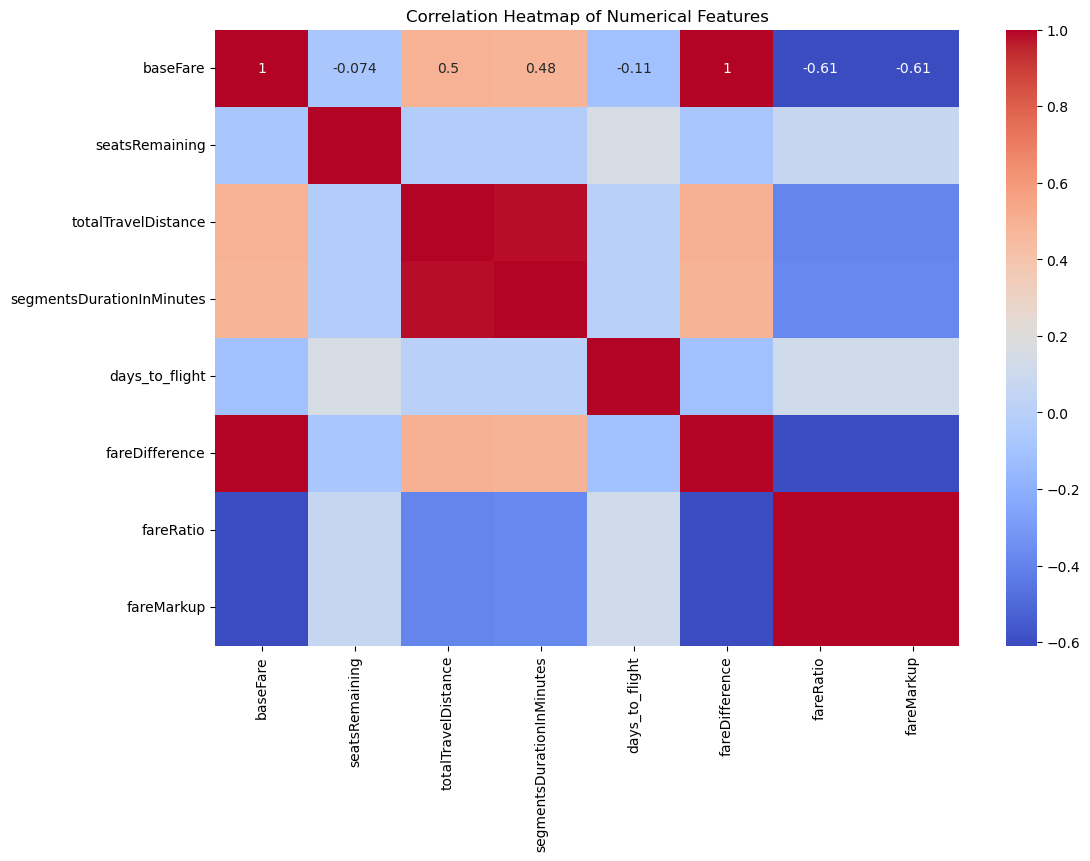

In [10]:
numerical_features = ['baseFare', 'seatsRemaining', 'totalTravelDistance', 'segmentsDurationInMinutes', 'days_to_flight', 'fareDifference', 'fareRatio', 'fareMarkup']
corr_matrix = df_finalEy[numerical_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

/Users/elliot/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/elliot/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


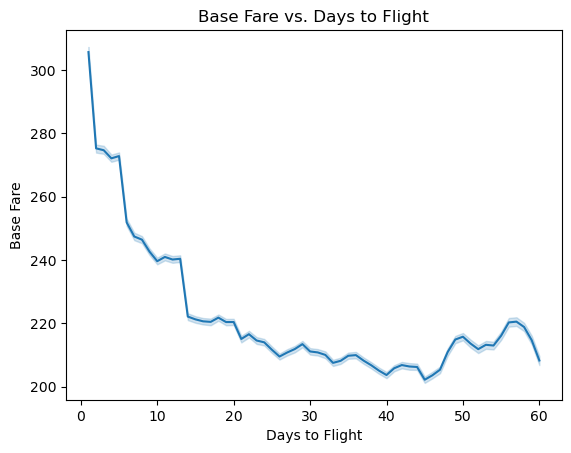

In [14]:
#Base fare based on how close you are to the flight date
sns.lineplot(data=sample_df, x='days_to_flight', y='baseFare')
plt.title('Base Fare vs. Days to Flight')
plt.xlabel('Days to Flight')
plt.ylabel('Base Fare')
plt.show()

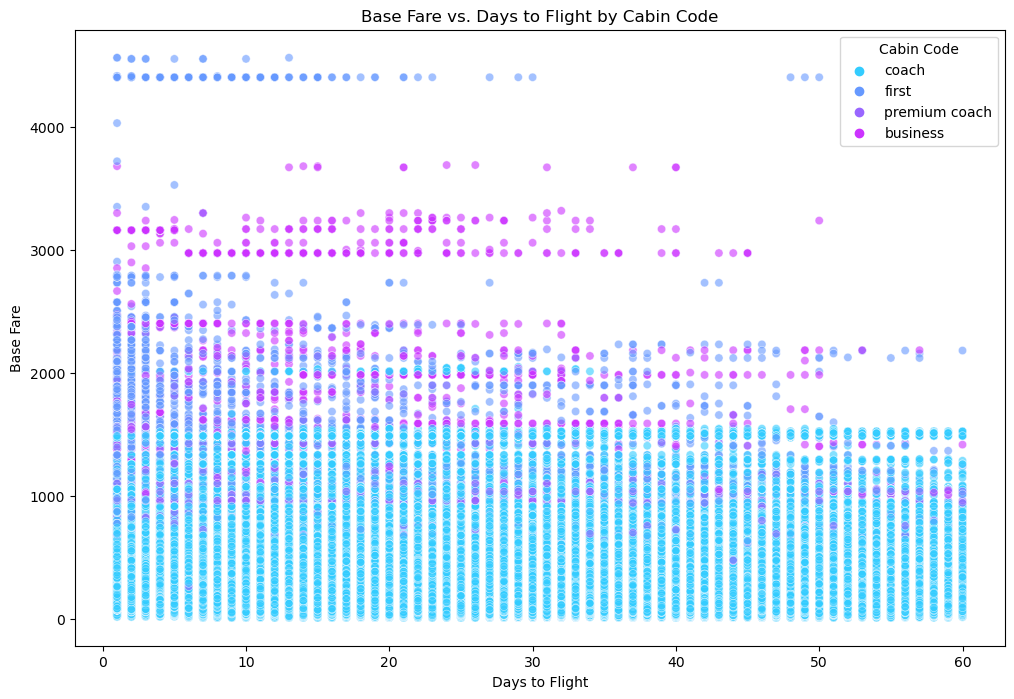

In [17]:
#understanding cabin code roles in base fare
plt.figure(figsize=(12, 8))
sns.scatterplot(data=sample_df, x='days_to_flight', y='baseFare', hue='segmentsCabinCode', palette='cool', alpha=0.6)
plt.title('Base Fare vs. Days to Flight by Cabin Code')
plt.xlabel('Days to Flight')
plt.ylabel('Base Fare')
plt.legend(title='Cabin Code')
plt.show()